In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from skimage.feature import blob_dog

In [19]:
def fit_spots(filename, min_x, max_x, min_y, max_y, center_x, center_y, center_radius):
    name = filename.split('.')[0]
    results = open(f"{name}_spots.txt", "w")
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blobs = blob_dog(img, min_sigma=1,max_sigma=10, threshold=0.18, overlap=0)

    fig, ax = plt.subplots(figsize=(15,10))
    ax.imshow(img, cmap='gray')
    for blob in blobs:
        y,x,r = blob
        if (
            (min_x < x < max_x) and (min_y < y < max_y)
            and not ((x - center_x)**2 + (y - center_y)**2 < center_radius**2)
    ):
            c = plt.Circle((x,y),5, color='yellow', linewidth=2, fill=False)
            ax.add_patch(c)
            results.write(f'{int(x)}\t{int(y)}\n')

    results.close()
    c = plt.Circle((center_x,center_y),center_radius, color='black')
    ax.add_patch(c)
    ax.axis('off')
    fig.savefig(f'{name}_fitted_spots.png')

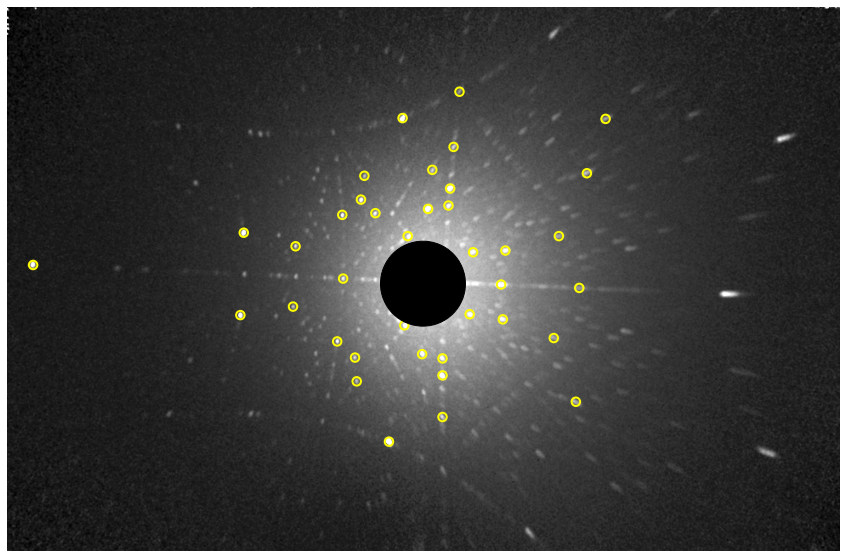

In [24]:
filename = 'Topaz1.png'
center_radius = 50
center_x=489
center_y =325
min_x = 0
max_x = 800
min_y = 50
max_y = 600

fit_spots(filename, min_x, max_x, min_y, max_y, center_x, center_y, center_radius)

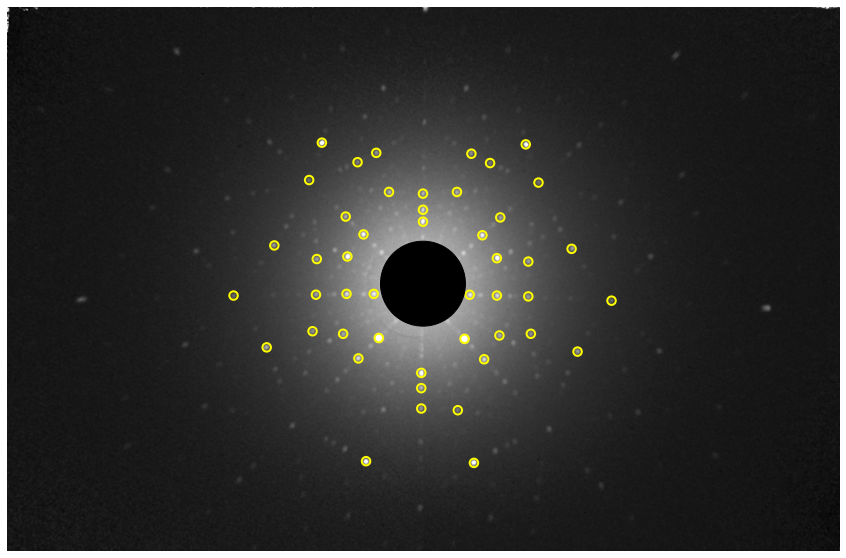

In [148]:
filename = 'Pyrit2.png'
center_radius = 50
center_x=489
center_y =325
min_x = 200
max_x = 800
min_y = 100
max_y = 550

fit_spots(filename, min_x, max_x, min_y, max_y, center_x, center_y, center_radius)

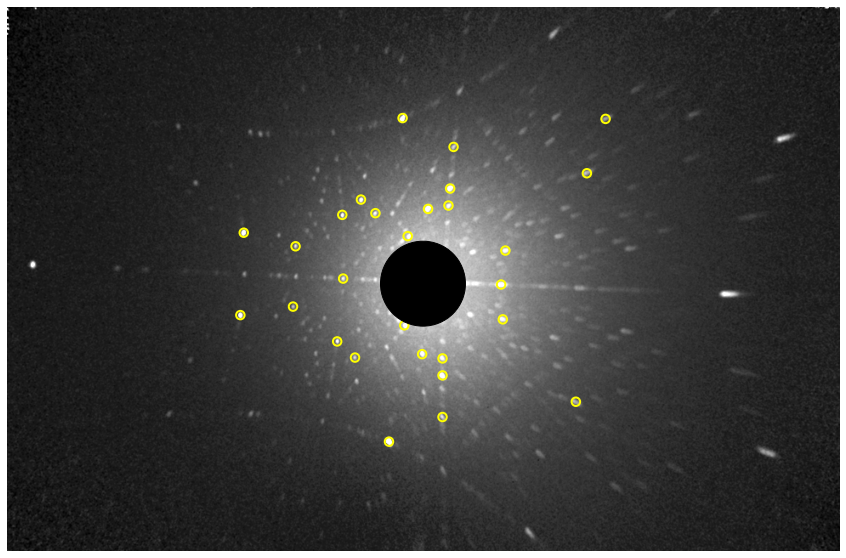